In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy import stats as stats
import warnings
warnings.filterwarnings("ignore")


In [2]:
#load database connection
conn=sqlite3.connect("inventory.db")
df=pd.read_sql_query("""select * from vendor_sales_summay""",conn)

## EDA

In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.500000,18761.500000,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.840000,10.455000,19.482500,5.681810e+03
Actual_price,10692.0,3.564367e+01,148.246016,0.49,10.990000,15.990000,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.000000,262.000000,1975.750000,3.376600e+05
TotalPurchaseDollar,10692.0,3.010669e+04,123067.799627,0.71,453.457500,3655.465000,20738.245000,3.811252e+06
TotalSalesDollar,10692.0,4.223907e+04,167655.265984,0.00,729.220000,5298.045000,28396.915000,5.101920e+06
TotalsalesPrice,10692.0,1.879378e+04,44952.773386,0.00,289.710000,2857.800000,16059.562500,6.728193e+05
TotalSalesQuantity,10692.0,3.077482e+03,10952.851391,0.00,33.000000,261.000000,1929.250000,3.349390e+05


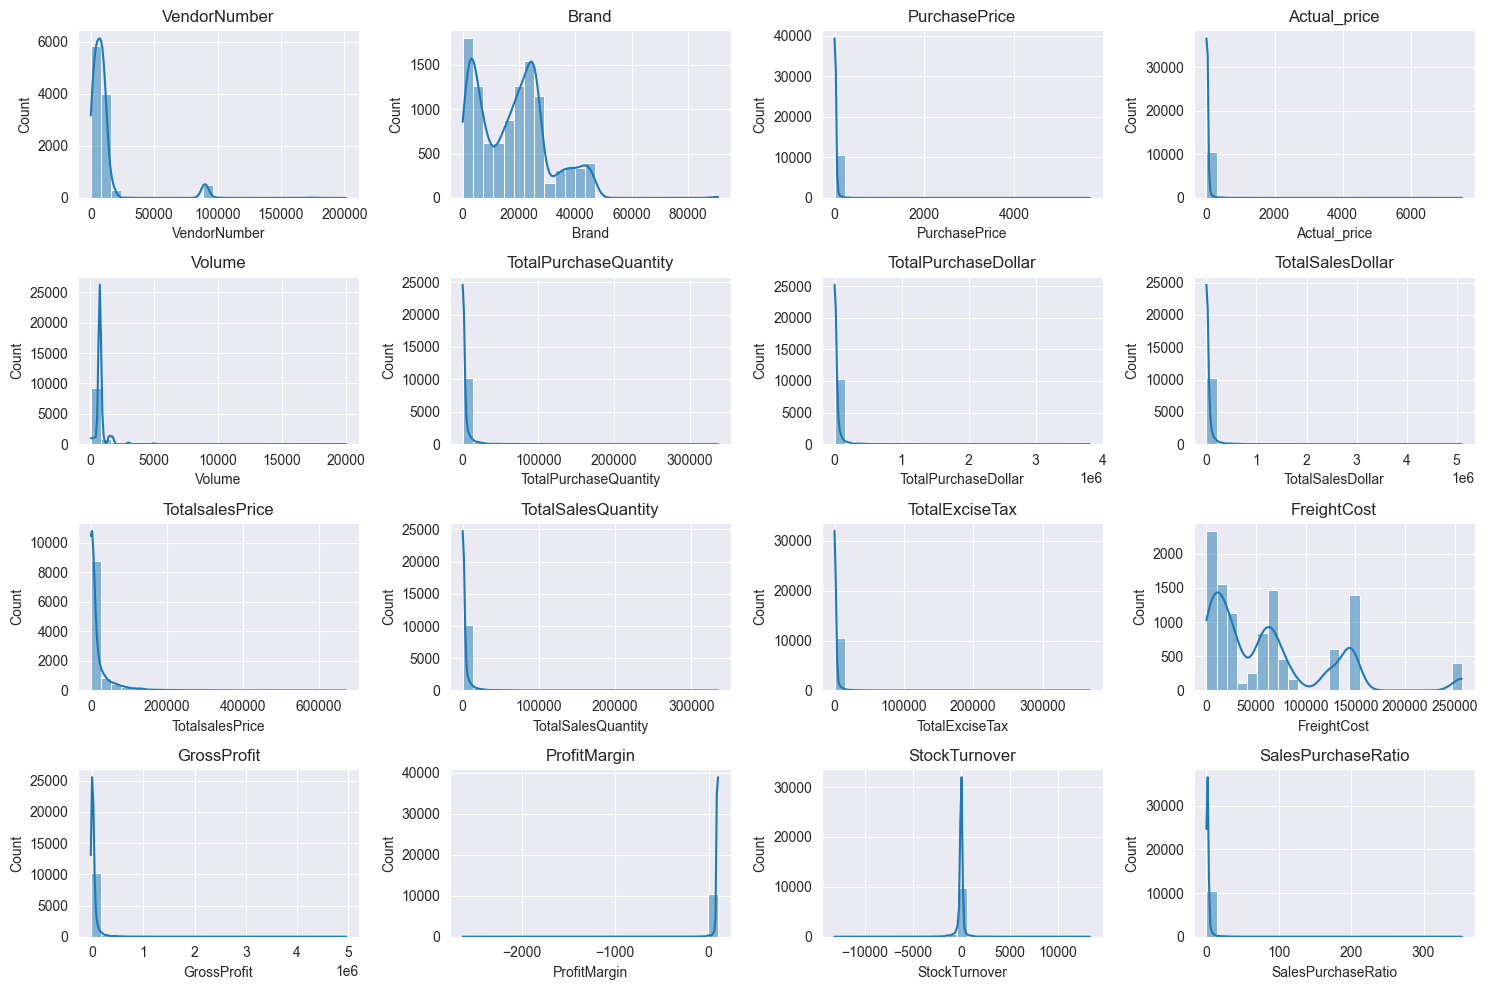

In [4]:
#Distribution for numerical columns
sns.set_style("darkgrid")
numeric_cols=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i ,cols in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.histplot(df[cols],kde=True,bins=25)
    plt.title(cols)
plt.tight_layout()
plt.show()

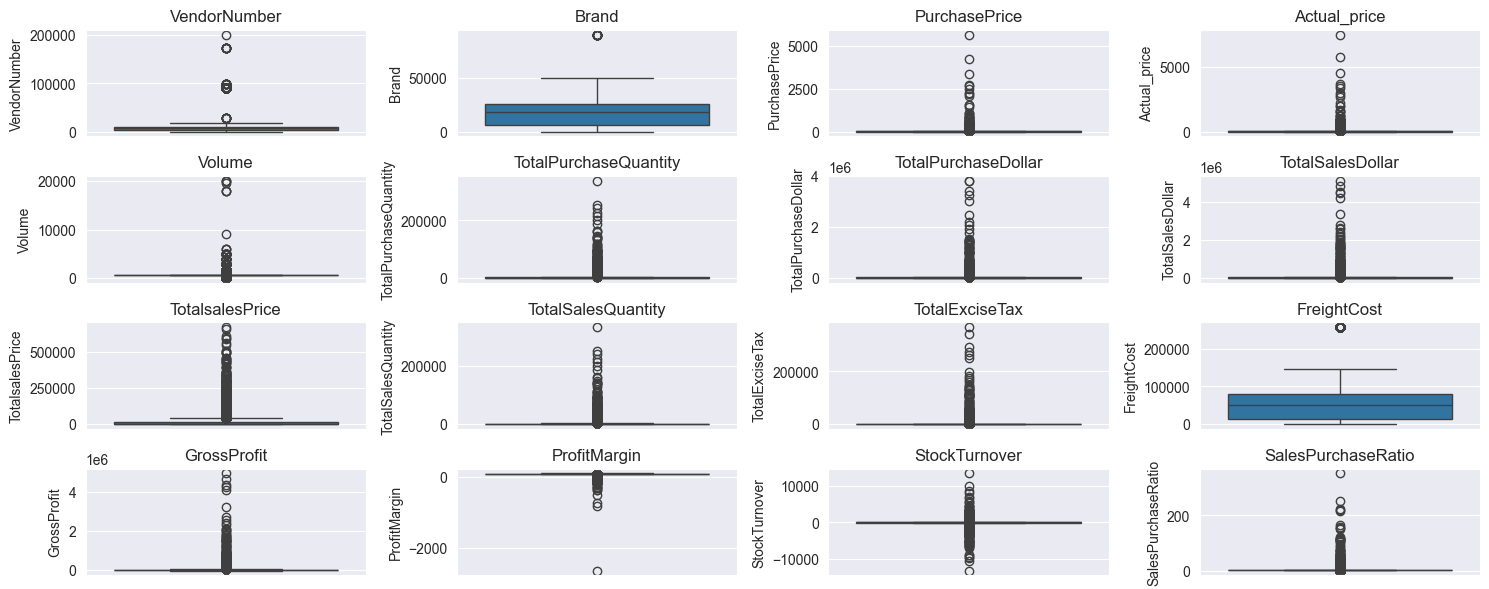

In [5]:
sns.set_style("darkgrid")
plt.figure(figsize=(15,6))
for i ,cols in enumerate(numeric_cols):
    plt.subplot(4,4,i+1)
    sns.boxplot(y=df[cols])
    plt.title(cols)
plt.tight_layout()
plt.show()
        

In [6]:
df=pd.read_sql_query("""
select * from vendor_sales_summay
where GrossProfit>0
and
ProfitMargin>0
and
TotalSalesQuantity>0""",conn)

In [7]:
df.shape

(10343, 18)

In [8]:
df.shape

(10343, 18)

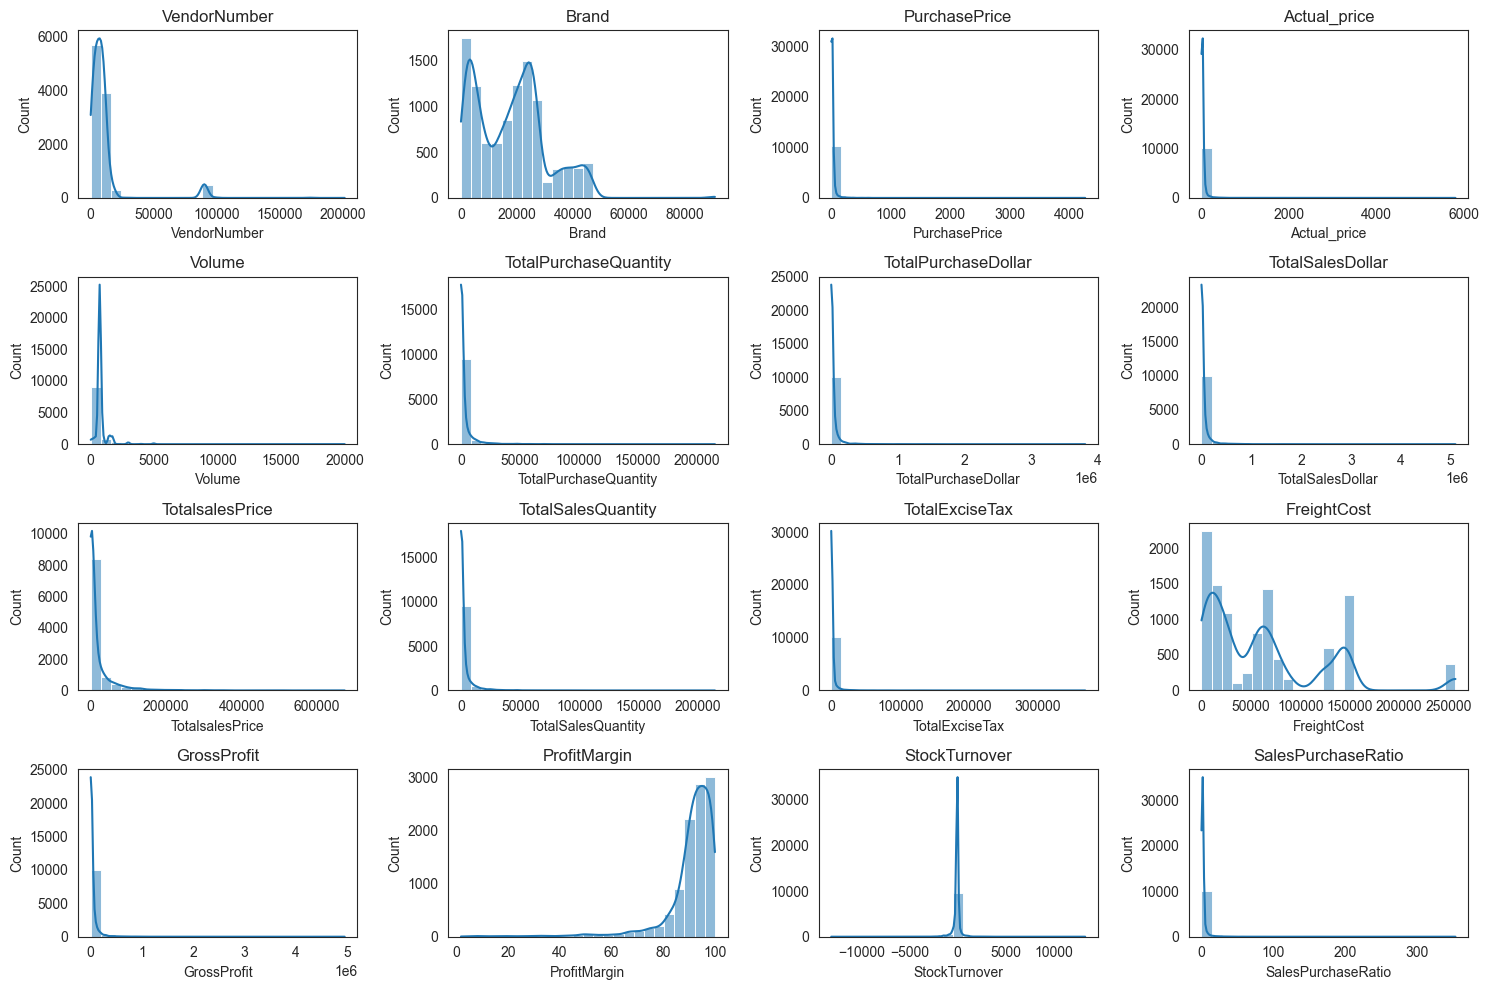

In [9]:
sns.set_style("white")
numeric_cols1=df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i ,cols in enumerate(numeric_cols1):
    plt.subplot(4,4,i+1)
    sns.histplot(df[cols],kde=True,bins=25)
    plt.title(cols)
plt.tight_layout()
plt.show()

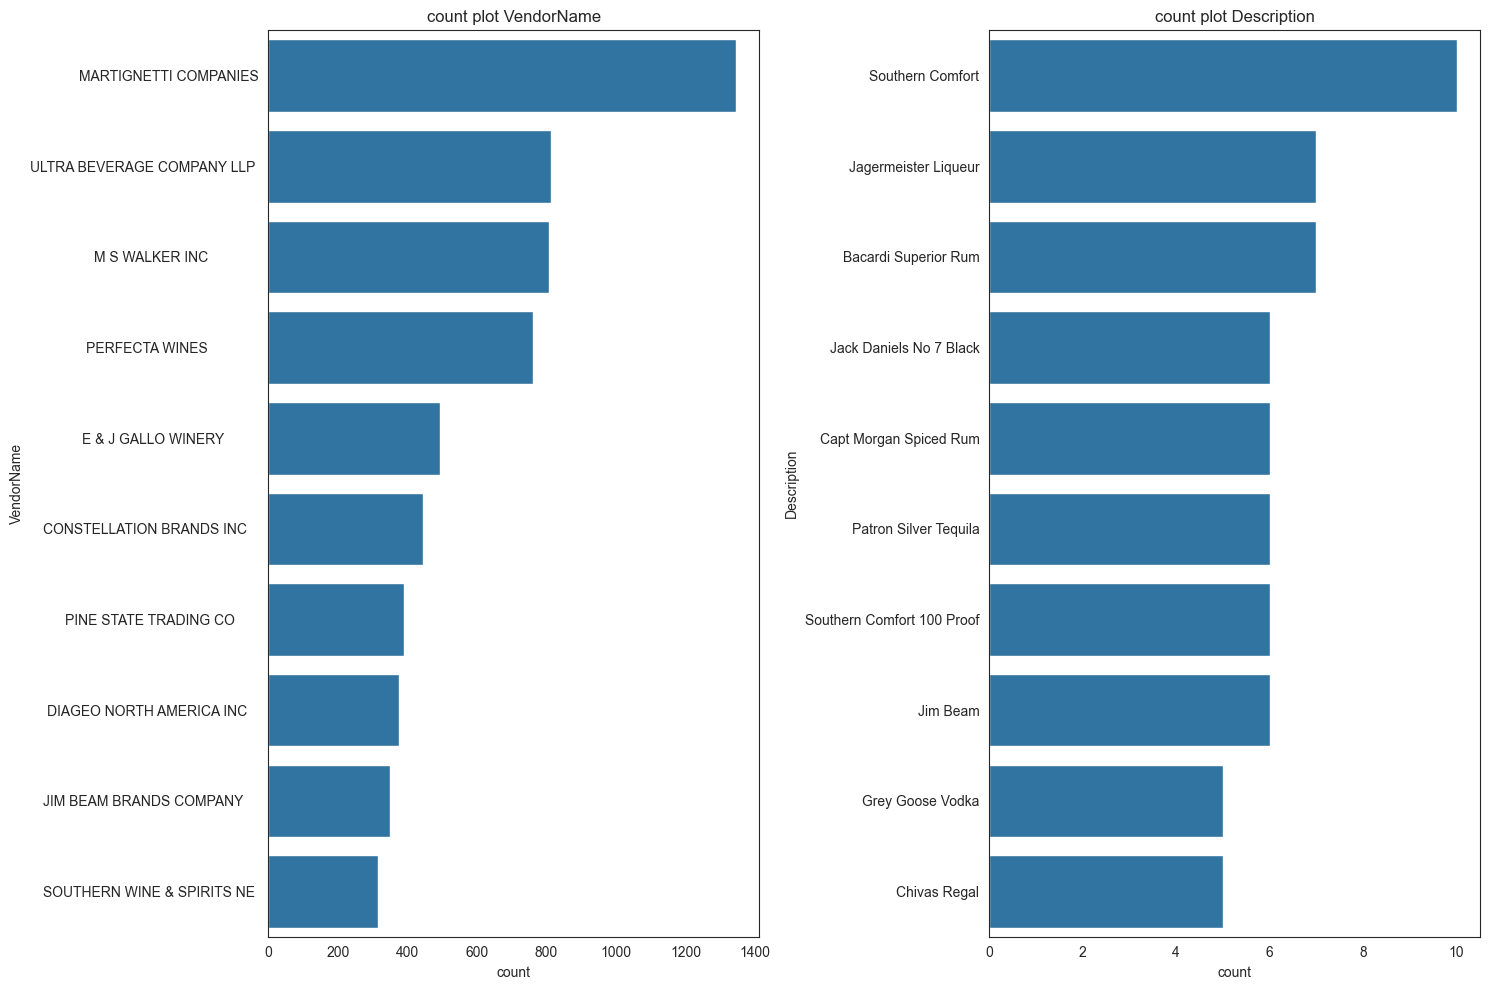

In [10]:
categorical_cols=['VendorName','Description']

plt.figure(figsize=(15,10))
for i,cols in enumerate(categorical_cols):
    plt.subplot(1,2,i+1)
    sns.countplot(df[cols],order=df[cols].value_counts().index[:10])
    plt.title(F"count plot {cols}")
plt.tight_layout()
plt.show()    

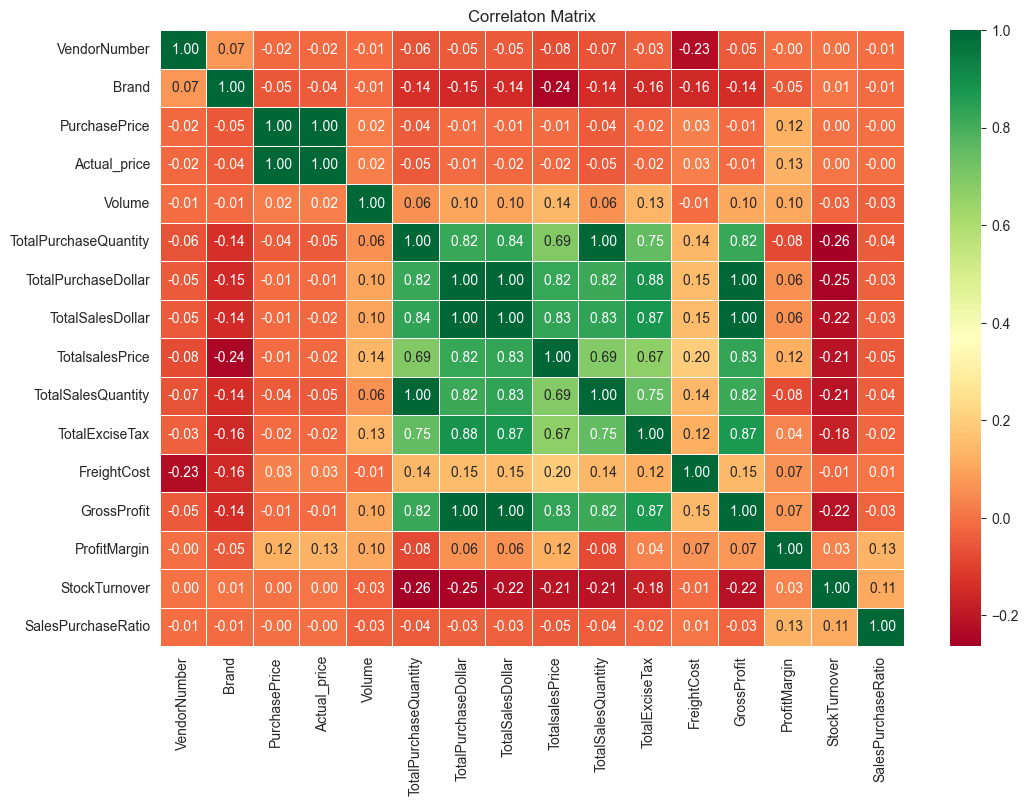

In [11]:
plt.figure(figsize=(12,8))
correlation_matrix=df[numeric_cols].corr()
sns.heatmap(correlation_matrix,annot=True,fmt=" .2f",cmap="RdYlGn",linewidths=0.5)
plt.title("Correlaton Matrix")
plt.show()

# data Analysis


In [12]:
brand_performance=df.groupby('Description').agg(
{
    'TotalSalesDollar':'sum',
    'ProfitMargin':'mean'
}).reset_index()

In [13]:
low_sales_threshold=brand_performance['TotalSalesDollar'].quantile(0.15)
high_margin_threshold=brand_performance['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold,high_margin_threshold

(359.70000000000005, 98.23274395941075)

In [15]:
brand_performance.head(5)

,Description,TotalSalesDollar,ProfitMargin
0,(RI) 1,21519.09,96.956191
1,.nparalleled Svgn Blanc,1094.63,86.936225
2,10 Span Cab Svgn CC,2703.89,84.060002
3,10 Span Chard CC,3325.56,85.927182
4,10 Span Pnt Gris Monterey Cy,2082.22,86.168609


In [16]:
#filter brand with low sales but high profit
target_brand=brand_performance[(brand_performance['TotalSalesDollar'] <= low_sales_threshold) &
(brand_performance['ProfitMargin'] >= high_margin_threshold)]
print("Brands with low salrie but high profit margin;")
display(target_brand.sort_values('TotalSalesDollar'))


Brands with low salrie but high profit margin;


,Description,TotalSalesDollar,ProfitMargin
2226,Cherry On Top Sweet White,64.95,98.460354
2249,Chinaco Anejo Tequila,66.99,98.507240
6973,Promesses de France CdRhone,71.91,98.609373
3850,Geyser Peak Pnt Nr,71.96,98.610339
7074,R Stemmler Carneros Pnt Nr E,73.98,98.648283
...,...,...,...
8906,Van Ruiten Family Cab Svgn,346.17,98.266748
4619,Jadot Marsannay Clos Roy 12,349.90,99.714204
6466,Olivier Chablis Savary,350.73,98.289282
7811,Silo Whiskey,354.42,99.153547


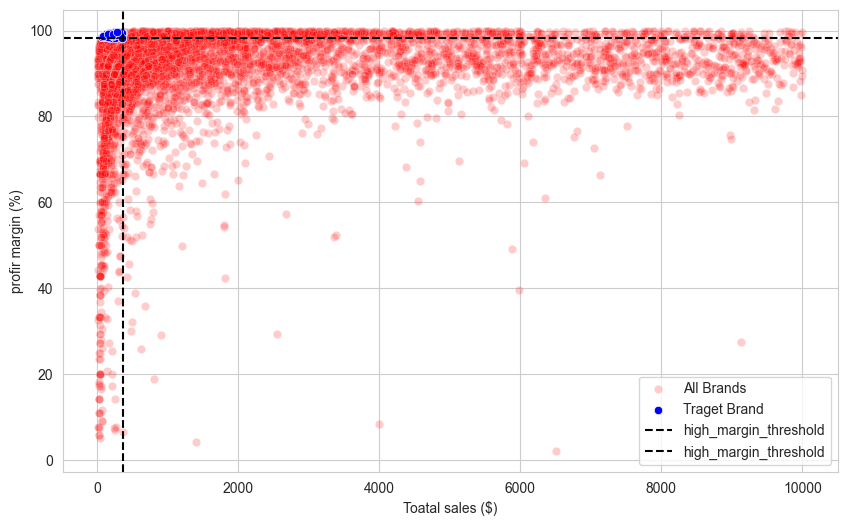

In [17]:
brand_performance=brand_performance[brand_performance['TotalSalesDollar']<10000]
sns.set_style("whitegrid")
plt.figure(figsize=(10,6))
sns.scatterplot(data=brand_performance,x='TotalSalesDollar',y='ProfitMargin',color='red',alpha=0.2,label='All Brands')
sns.scatterplot(data=target_brand,x='TotalSalesDollar',y='ProfitMargin',color='blue',label='Traget Brand')
plt.axhline(high_margin_threshold,linestyle='--',color='black',label='high_margin_threshold')
plt.axvline(low_sales_threshold,linestyle='--',color='black',label='high_margin_threshold')
plt.xlabel("Toatal sales ($)")
plt.ylabel("profir margin (%)")
plt.legend()
plt.show()

In [18]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_price,Volume,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesDollar,TotalsalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.14,98.825464,85.0,119.915493
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,142.28,99.302066,71.0,97.469388
2,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,59.66,90.862016,128.0,28.059829
3,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.95,87.460815,3.0,6.041667
4,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,27.86,5.97,14.0,0.73,257032.07,25.86,92.821249,12.0,9.809859


In [19]:
def format_dollar(value):
    if value >=1000000:
        return f"{value/1000000:.2f}M"
    elif value>=1000:
        return f"{value/1000:.2f}K"
    else:
        return str(value)

In [20]:
top_vendor=df.groupby('VendorName')['TotalSalesDollar'].sum().nlargest(10)
top_brand=df.groupby('Description')['TotalSalesDollar'].sum().nlargest(10)

In [21]:
top_vendor

VendorName
DIAGEO NORTH AMERICA INC       6.685371e+07
MARTIGNETTI COMPANIES          4.090264e+07
PERNOD RICARD USA              3.227525e+07
JIM BEAM BRANDS COMPANY        3.137539e+07
BACARDI USA INC                2.497443e+07
CONSTELLATION BRANDS INC       2.444894e+07
E & J GALLO WINERY             1.853635e+07
BROWN-FORMAN CORP              1.835964e+07
ULTRA BEVERAGE COMPANY LLP     1.776216e+07
M S WALKER INC                 1.542834e+07
Name: TotalSalesDollar, dtype: float64

In [22]:
top_vendor=top_vendor.apply(lambda x :format_dollar(x))
top_brand=top_brand.apply(lambda x : format_dollar(x))

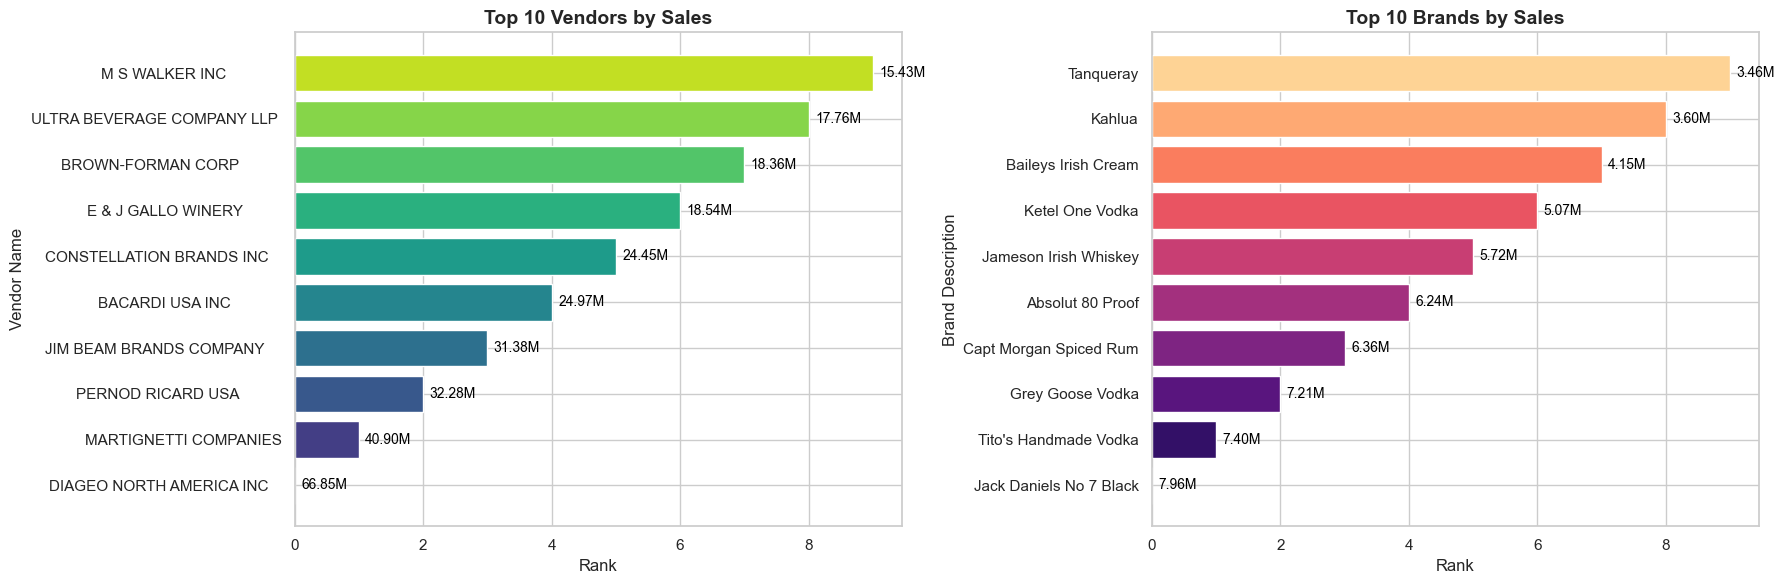

In [23]:
# Set up the plot style
sns.set(style='whitegrid', palette='Set2')
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Plot for Top Vendors
axes[0].barh(top_vendor.index, [i for i in range(len(top_vendor))], color=sns.color_palette("viridis", len(top_vendor)))
axes[0].set_title("Top 10 Vendors by Sales", fontsize=14, fontweight='bold')
axes[0].set_xlabel("Rank", fontsize=12)
axes[0].set_ylabel("Vendor Name", fontsize=12)

# Add formatted values as labels
for i, label in enumerate(top_vendor.values):
    axes[0].text(i + 0.1, i, label, va='center', fontsize=10, color='black')

# Plot for Top Brands
axes[1].barh(top_brand.index, [i for i in range(len(top_brand))], color=sns.color_palette("magma", len(top_brand)))
axes[1].set_title("Top 10 Brands by Sales", fontsize=14, fontweight='bold')
axes[1].set_xlabel("Rank", fontsize=12)
axes[1].set_ylabel("Brand Description", fontsize=12)

# Add formatted values as labels
for i, label in enumerate(top_brand.values):
    axes[1].text(i + 0.1, i, label, va='center', fontsize=10, color='black')

plt.tight_layout()
plt.show()


In [24]:
vendor_performance=df.groupby('VendorName')[['TotalPurchaseDollar','GrossProfit','TotalSalesDollar']].sum().reset_index()

In [25]:
vendor_performance['Purchase_contribution']=vendor_performance['TotalPurchaseDollar']/vendor_performance['TotalPurchaseDollar'].sum()

In [26]:
vendor_performance=round(vendor_performance.sort_values('Purchase_contribution',ascending=False),2)

In [27]:
vendor_performance.shape

(126, 5)

In [28]:
top_vendors=vendor_performance.head(10)

In [29]:
top_vendors

,VendorName,TotalPurchaseDollar,GrossProfit,TotalSalesDollar,Purchase_contribution
27,DIAGEO NORTH AMERICA INC,49522981.44,63323987.74,66853709.74,0.16
61,MARTIGNETTI COMPANIES,27727215.10,38270706.11,40902644.11,0.09
73,PERNOD RICARD USA,24112379.86,30635294.76,32275247.76,0.08
49,JIM BEAM BRANDS COMPANY,23750521.31,29227771.52,31375394.52,0.07
7,BACARDI USA INC,17590278.63,23592117.30,24974427.30,0.06
22,CONSTELLATION BRANDS INC,15554045.95,22144462.77,24448936.77,0.05
13,BROWN-FORMAN CORP,13419972.31,17473224.60,18359638.60,0.04
112,ULTRA BEVERAGE COMPANY LLP,13064234.03,16734166.08,17762157.08,0.04
32,E & J GALLO WINERY,12266992.03,16703749.57,18536348.57,0.04
57,M S WALKER INC,10802827.94,14072215.85,15428341.85,0.03


In [30]:
top_vendors['TotalPurchaseDollar']=top_vendors['TotalPurchaseDollar'].apply(lambda x:format_dollar(x))
top_vendors['GrossProfit']=top_vendors['GrossProfit'].apply(lambda x:format_dollar(x))
top_vendors['TotalSalesDollar']=top_vendors['TotalSalesDollar'].apply(lambda x:format_dollar(x))
top_vendors

,VendorName,TotalPurchaseDollar,GrossProfit,TotalSalesDollar,Purchase_contribution
27,DIAGEO NORTH AMERICA INC,49.52M,63.32M,66.85M,0.16
61,MARTIGNETTI COMPANIES,27.73M,38.27M,40.90M,0.09
73,PERNOD RICARD USA,24.11M,30.64M,32.28M,0.08
49,JIM BEAM BRANDS COMPANY,23.75M,29.23M,31.38M,0.07
7,BACARDI USA INC,17.59M,23.59M,24.97M,0.06
22,CONSTELLATION BRANDS INC,15.55M,22.14M,24.45M,0.05
13,BROWN-FORMAN CORP,13.42M,17.47M,18.36M,0.04
112,ULTRA BEVERAGE COMPANY LLP,13.06M,16.73M,17.76M,0.04
32,E & J GALLO WINERY,12.27M,16.70M,18.54M,0.04
57,M S WALKER INC,10.80M,14.07M,15.43M,0.03


In [31]:
top_vendors['Purchase_contribution'].sum()

0.6600000000000001

In [32]:
top_vendors['Commulative_contribution']=top_vendors['Purchase_contribution'].cumsum()*100

In [33]:
top_vendors

,VendorName,TotalPurchaseDollar,GrossProfit,TotalSalesDollar,Purchase_contribution,Commulative_contribution
27,DIAGEO NORTH AMERICA INC,49.52M,63.32M,66.85M,0.16,16.0
61,MARTIGNETTI COMPANIES,27.73M,38.27M,40.90M,0.09,25.0
73,PERNOD RICARD USA,24.11M,30.64M,32.28M,0.08,33.0
49,JIM BEAM BRANDS COMPANY,23.75M,29.23M,31.38M,0.07,40.0
7,BACARDI USA INC,17.59M,23.59M,24.97M,0.06,46.0
22,CONSTELLATION BRANDS INC,15.55M,22.14M,24.45M,0.05,51.0
13,BROWN-FORMAN CORP,13.42M,17.47M,18.36M,0.04,55.0
112,ULTRA BEVERAGE COMPANY LLP,13.06M,16.73M,17.76M,0.04,59.0
32,E & J GALLO WINERY,12.27M,16.70M,18.54M,0.04,63.0
57,M S WALKER INC,10.80M,14.07M,15.43M,0.03,66.0


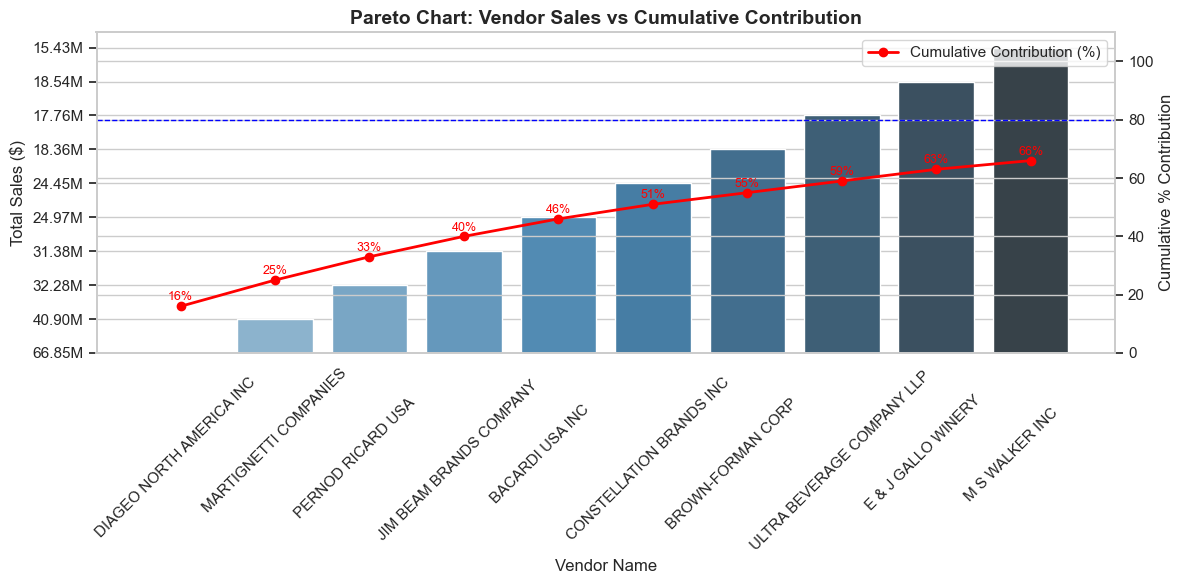

In [34]:

fig, ax1 = plt.subplots(figsize=(12, 6))

# Bar plot: Total Sales
sns.barplot(
    x=top_vendors['VendorName'],
    y=top_vendors['TotalSalesDollar'],
    ax=ax1,
    palette='Blues_d'
)
ax1.set_xlabel("Vendor Name", fontsize=12)
ax1.set_ylabel("Total Sales ($)", fontsize=12)
ax1.set_title("Pareto Chart: Vendor Sales vs Cumulative Contribution", fontsize=14, fontweight='bold')
ax1.tick_params(axis='x', rotation=45)

# Line plot: Cumulative Contribution (%)
ax2 = ax1.twinx()
ax2.plot(
    top_vendors['VendorName'],
    top_vendors['Commulative_contribution'],
    color='red',
    marker='o',
    linewidth=2,
    label='Cumulative Contribution (%)'
)
ax2.set_ylabel("Cumulative % Contribution", fontsize=12)
ax2.set_ylim(0, 110)
ax2.axhline(80, color='blue', linestyle='--', linewidth=1)

# Add percentage labels
for i, val in enumerate(top_vendors['Commulative_contribution']):
    ax2.text(i, val + 2, f"{val:.0f}%", ha='center', fontsize=9, color='red')

ax2.legend(loc='upper right')
ax1.invert_yaxis()
plt.tight_layout()
plt.show()


In [35]:
print(f"Totalpurchase contribution of the top 10 vendors is :{round(top_vendors['Purchase_contribution'].sum()*100,2)} %")

Totalpurchase contribution of the top 10 vendors is :66.0 %


In [36]:
vendors=list(top_vendors['VendorName'].values)
vendors=[s.strip() for s in vendors]
purchase_contribution=list(top_vendors['Purchase_contribution'].values)
purchase_contribution=list(map(lambda x:x*100 if x<1 else x,purchase_contribution))
purchase_contribution=[round(i,1) for i in purchase_contribution]
total_contribution=sum(purchase_contribution)
remaining_contribution=100-total_contribution
vendors.append('Other vendor')
purchase_contribution.append(remaining_contribution)

purchase_contribution

[16.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 4.0, 4.0, 3.0, 34.0]

In [37]:
purchase_contribution

[16.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 4.0, 4.0, 3.0, 34.0]

In [38]:
total_contribution

66.0

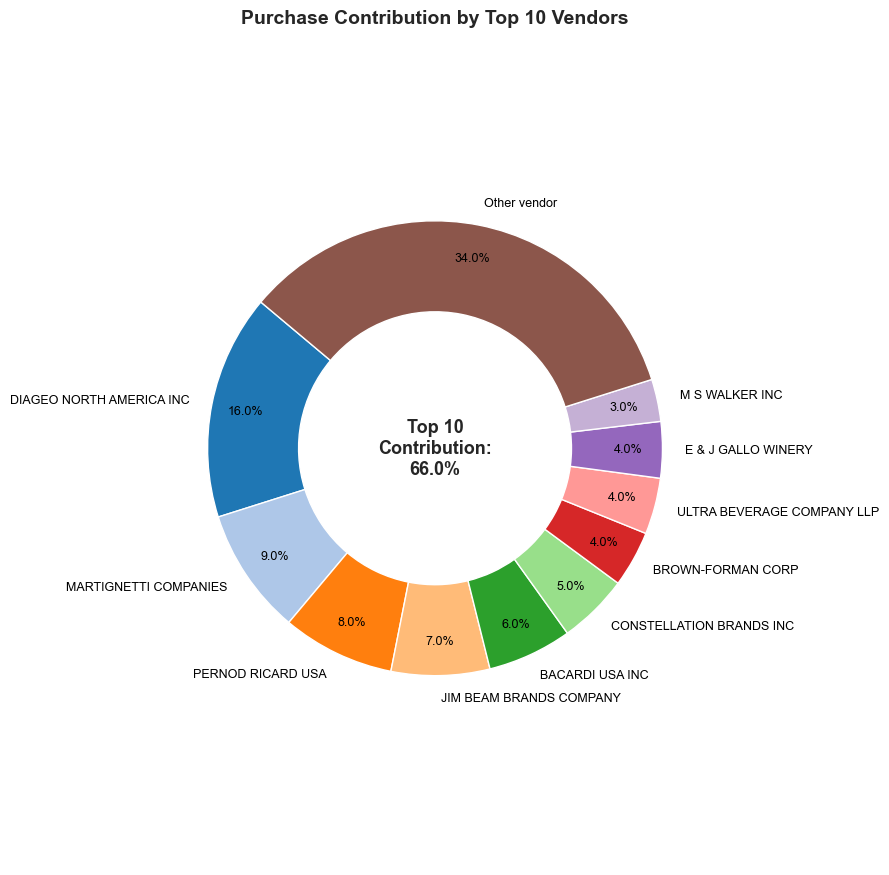

In [39]:
total_pct = round(top_vendors['Purchase_contribution'].sum() * 100, 2)


colors = sns.color_palette("tab20", len(vendors))


fig, ax = plt.subplots(figsize=(9, 9))


wedges, texts, autotexts = ax.pie(
    purchase_contribution,
    labels=vendors,
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    wedgeprops=dict(width=0.4),
    pctdistance=0.85,  
    textprops=dict(color='black', fontsize=9)
)




ax.axis('equal')


center_text = f"Top 10\nContribution:\n{total_pct}%"
ax.text(0, 0, center_text, ha='center', va='center', fontsize=13, fontweight='bold')


plt.title("Purchase Contribution by Top 10 Vendors", fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()


In [40]:
df['UnitPricePurchase']=df['TotalPurchaseDollar']/df['TotalPurchaseQuantity']


In [41]:
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_price,Volume,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesDollar,TotalsalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio,UnitPricePurchase
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.14,98.825464,85.0,119.915493,0.71
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,142.28,99.302066,71.0,97.469388,1.47
2,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,59.66,90.862016,128.0,28.059829,0.39
3,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.95,87.460815,3.0,6.041667,1.32
4,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,27.86,5.97,14.0,0.73,257032.07,25.86,92.821249,12.0,9.809859,1.42


In [42]:
df['OrderSize']=pd.qcut(df['TotalPurchaseQuantity'],q=3,labels=['small','medium','large'])
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,Actual_price,Volume,TotalPurchaseQuantity,TotalPurchaseDollar,TotalSalesDollar,TotalsalesPrice,TotalSalesQuantity,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesPurchaseRatio,UnitPricePurchase,OrderSize
0,7245,PROXIMO SPIRITS INC.,3065,Three Olives Grape Vodka,0.71,0.99,50.0,1,0.71,85.14,33.66,86.0,4.46,38994.78,84.14,98.825464,85.0,119.915493,0.71,small
1,3960,DIAGEO NORTH AMERICA INC,6127,The Club Strawbry Margarita,1.47,1.99,200.0,1,1.47,143.28,77.61,72.0,15.12,257032.07,142.28,99.302066,71.0,97.469388,1.47,small
2,8004,SAZERAC CO INC,5683,Dr McGillicuddy's Apple Pie,0.39,0.49,50.0,6,2.34,65.66,1.47,134.0,7.04,50293.62,59.66,90.862016,128.0,28.059829,0.39,small
3,9815,WINE GROUP INC,8527,Concannon Glen Ellen Wh Zin,1.32,4.99,750.0,2,2.64,15.95,10.96,5.0,0.55,27100.41,13.95,87.460815,3.0,6.041667,1.32,small
4,3960,DIAGEO NORTH AMERICA INC,2626,Crown Royal Apple,1.42,1.99,50.0,2,2.84,27.86,5.97,14.0,0.73,257032.07,25.86,92.821249,12.0,9.809859,1.42,small


In [43]:
df.groupby('OrderSize')['UnitPricePurchase'].mean()

OrderSize
small     41.592865
medium    17.888125
large     11.532597
Name: UnitPricePurchase, dtype: float64

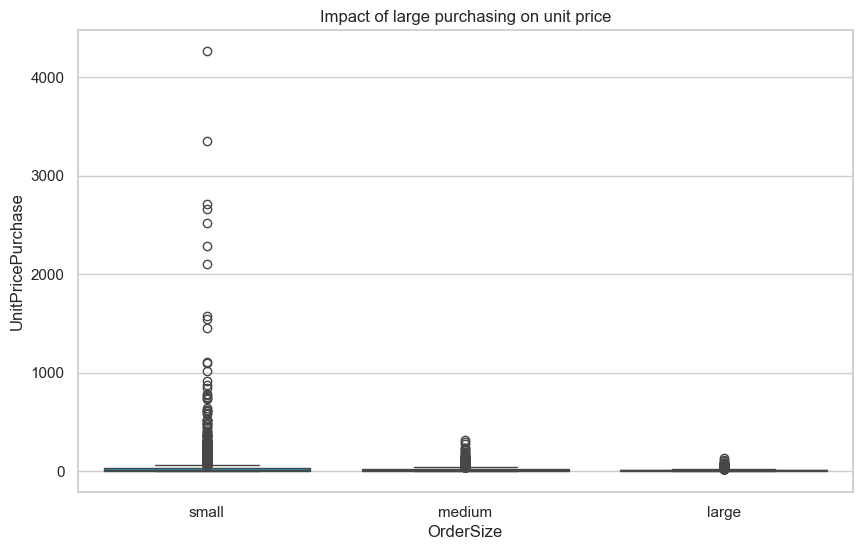

In [44]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x='OrderSize',y='UnitPricePurchase',palette='rainbow')
plt.title("Impact of large purchasing on unit price")
plt.show()

In [45]:
df[df['StockTurnover']<1].groupby('VendorName')[['StockTurnover']].mean().sort_values(['StockTurnover'],ascending=True).head(10)

,StockTurnover
VendorName,
DUGGANS DISTILLED PRODUCTS,-866.333333
ADAMBA IMPORTS INTL INC,-756.000000
FABRIZIA SPIRITS LLC,-645.500000
SIDNEY FRANK IMPORTING CO,-641.125000
Russian Standard Vodka,-613.000000
SEA HAGG DISTILLERY LLC,-611.750000
BLACK COVE BEVERAGES,-606.000000
OLE SMOKY DISTILLERY LLC,-521.428571
SWEET BABY VINEYARD,-508.000000


In [46]:
low_threshold=df['TotalSalesDollar'].quantile(0.25)
high_threshold=df['TotalSalesDollar'].quantile(0.75)

In [47]:
low_threshold

838.615

In [48]:
high_threshold

29831.97500000072

In [51]:
top_vendors=df[df['TotalSalesDollar']>=high_threshold]['ProfitMargin'].dropna()
low_vendors=df[df['TotalSalesDollar']<=high_threshold]['ProfitMargin'].dropna()

In [52]:
low_vendors

0       98.825464
1       99.302066
2       90.862016
3       87.460815
4       92.821249
          ...    
8793    98.301616
8824    98.318664
8870    80.812114
9189    94.815715
9390    79.065277
Name: ProfitMargin, Length: 7757, dtype: float64

In [61]:
def confidence_interval(data,confidence=0.95):
    mean_val=np.mean(data)
    std_error=np.std(data,ddof=1)/np.sqrt(len(data))
    t_crirical=stats.t.ppf((1+confidence)/2,df=len(data)-1)
    margin_of_error=t_critical=std_error
    return mean_val,mean_val-margin_of_error,mean_val+margin_of_error
    

In [65]:
top_mean,top_lower,top_upper=confidence_interval(top_vendors,confidence=0.95)
low_mean,low_lower,low_upper=confidence_interval(low_vendors,confidence=0.95)

Top Vendors 95% CI: (92.02,92.31,Mean:92.17)
Low Vendors 95% CI: (90.04,90.31,Mean:90.18)


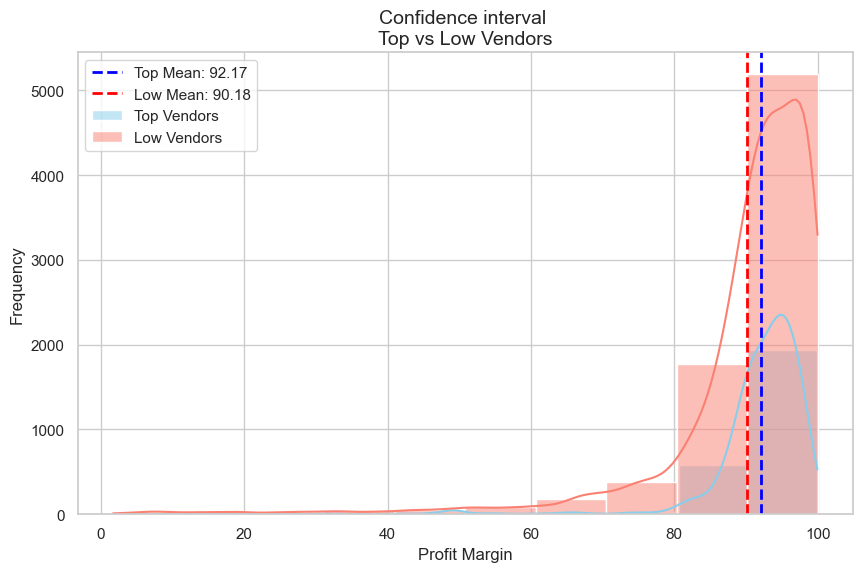

In [66]:
print(f"Top Vendors 95% CI: ({top_lower:.2f},{top_upper:.2f},Mean:{top_mean:.2f})")
print(f"Low Vendors 95% CI: ({low_lower:.2f},{low_upper:.2f},Mean:{low_mean:.2f})")
fig, ax = plt.subplots(figsize=(10, 6))

# Plot histograms
sns.histplot(top_vendors, bins=10, color='skyblue', kde=True, label='Top Vendors', ax=ax)
sns.histplot(low_vendors, bins=10, color='salmon', kde=True, label='Low Vendors', ax=ax)

# Add vertical lines for means
ax.axvline(top_mean, color='blue', linestyle='--', linewidth=2, label=f'Top Mean: {top_mean:.2f}')
ax.axvline(low_mean, color='red', linestyle='--', linewidth=2, label=f'Low Mean: {low_mean:.2f}')

# Plot settings
ax.set_title("Confidence interval \nTop vs Low Vendors", fontsize=14)
ax.set_xlabel("Profit Margin")
ax.set_ylabel("Frequency")
ax.legend()

In [67]:
# is there any significantly difference in profit margin between top_performing and low-performing vendors
#null hypothesis There is no significant different in top  perming vendor and mean profit margin
#null hypothesis There is  significant different in low  perming vendor and mean profit margin

In [72]:
t_stat,p_value=stats.ttest_ind(top_vendors,low_vendors,equal_var=False)
print(f"T-static : {t_stat:.4f} .p_value: {p_value:.4f}")
if p_value <0.05:
    print("reject the null hypothesis There is  significant different in low  perming vendor and mean profit margin")
else:
    print("There is no significant different in top  performing vendor and mean profit margin")

T-static : 10.1287 .p_value: 0.0000
reject the null hypothesis There is  significant different in low  perming vendor and mean profit margin
